<a href="https://colab.research.google.com/github/bob8dod/ML-studying/blob/main/2021ML/7.%20Principal%20Component%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 차원축소, 와인 종류 예측하기

In [ ]:
#데이터 로드
from sklearn.datasets import load_wine
data = load_wine()
X  = data.data
Y = data.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y)

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [ ]:
#차원축소
from sklearn.decomposition import PCA

pca = PCA(n_components=4) #주요 하이퍼파라미터는 n_components, 몇개의 주성분으로 추출하여 축소할 것인가
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train_pca,y_train)
lr.score(x_test_pca,y_test)

0.9629629629629629

# n_components 구하기 -> elbow point!

In [ ]:
##중요##
#PCA의 주축(component)개수 구하기 위한 분석
import numpy as np
cov = np.cov(x_train.T) #공분산 구하기
eigen_vals, eigen_vecs = np.linalg.eig(cov) #아이겐벨류(분산), 아이겐벡터(기저) 구하기
print('Eigenvalues \n%s' %eigen_vals)

Eigenvalues 
[4.7095539  2.63606471 1.55728758 0.93422662 0.85129454 0.5709688
 0.46462025 0.37764772 0.10409155 0.14951983 0.21165109 0.2630501
 0.27571434]


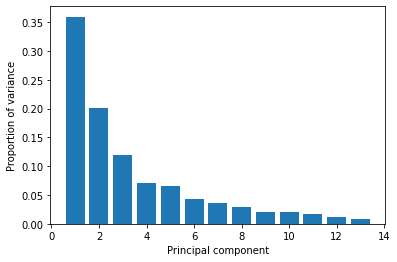

In [ ]:
#Explained variance ratio
total = sum(eigen_vals)
var_exp = [(i / total) for i in sorted(eigen_vals, reverse=True)] # 해당 주성분으로 설명가능한 데이터 비율

import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp)
plt.ylabel('Proportion of variance')
plt.xlabel('Principal component')
plt.show()


In [ ]:
# 이를 통해 n_component는 4or6이 되어야된다는것을 알 수 있음